In [38]:
from os import listdir
from os.path import isfile
from fnmatch import fnmatch
import pickle
import pandas as pd

import numpy as np
from scipy.stats import gaussian_kde
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE

from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
from rdkit.Chem.Fingerprints import FingerprintMols

from matplotlib import pyplot as plt
import py3Dmol

from tqdm import tqdm_notebook as tqdm

In [39]:
def draw3D(m,p=None,confId=-1):
    '''
    draw chemical structures using 3D stick depictions
    adapted from http://rdkit.blogspot.com/2016/07/a-recent-post-on-in-pipeline-talked.html
    '''
    mb = Chem.MolToMolBlock(m,confId=confId)
    if p is None:
        p = py3Dmol.view(width=400,height=400)
    p.removeAllModels()
    p.addModel(mb,'sdf')
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    return p.show()

# SMILES

CC(=O)NC1CCSC1=O


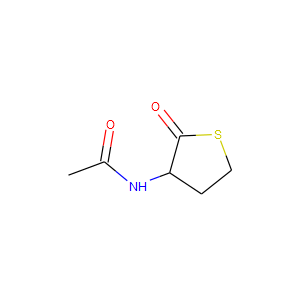

In [3]:
mols = Chem.SmilesMolSupplier('Maybridge_Ro3_Diversity_Set1.smi') # input SMILES file
m = mols[1] # second molecule
print(Chem.MolToSmiles(m)) # SMILES pattern for first molecule
Draw.MolToImage(m)

# SDF

In [4]:
mols = Chem.SDMolSupplier('Maybridge_Ro3_Diversity_Set1.sdf') # input SD file
m = mols[1] # first molecule
print(Chem.MolToMolBlock(m)) # block for first molecule
draw3D(m)


     RDKit          2D

 10 10  0  0  0  0  0  0  0  0999 V2000
    4.6250   -5.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.3417   -4.2542    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.6292   -4.6750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9167   -5.9167    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    6.0542   -4.6625    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.3417   -5.9125    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.0667   -5.4875    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.2042   -4.6667    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2042   -5.4917    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.7667   -4.2417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  2  3  1  0
  3  1  1  0
  4  1  1  0
  5  2  1  0
  6  1  2  0
  7  5  2  0
  8  3  1  0
  9  4  1  0
 10  5  1  0
  8  9  1  0
M  END



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
m2 = Chem.AddHs(m)
AllChem.EmbedMolecule(m2)
AllChem.MMFFOptimizeMolecule(m2)
print(Chem.MolToMolBlock(m2)) # block for first molecule
draw3D(m2)


     RDKit          3D

 19 19  0  0  0  0  0  0  0  0999 V2000
   -1.3912   -0.7729    1.3471 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8149   -0.2635    0.4168 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5829    0.1418    0.4393 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0360   -0.9679    0.7518 S   0  0  0  0  0  0  0  0  0  0  0  0
    1.7695    0.5369   -0.1621 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9751   -1.3091    2.3644 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5013    1.5607   -0.7817 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2598    0.0308   -0.9249 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7563    0.1070   -0.6829 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1829    0.0599    0.0334 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1099   -0.9218    1.1331 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6496    1.1641    0.8313 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9370    0.8272   -1.6038 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0022   -0.9206   -1

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [6]:
[str(x) for x in m.GetPropNames()] # list properties stored in SD file

['Code',
 'Structure_smiles',
 'Appearance',
 'casno',
 'product_name',
 'c_log_p',
 'acd_code',
 'Flexibility',
 'PSA',
 'h_bond_donors',
 'h_bond_acceptors',
 'parent_mw',
 'Heavy_Atom_Count',
 'PAINS_Free',
 'Set']

# 2D descriptors (e.g. rule of three)

In [21]:
def Ro3_descriptors(library):
    '''
    calculate rule of three 2D descriptors for a collection of molecules 
    '''
    mols = Chem.SDMolSupplier(library)
    
    xrange = range(len(mols))
    zeros = np.zeros(len(mols))
    
    df = pd.DataFrame({'MolWt' : zeros, 'MolLogP' : zeros, 'NumHAcceptors' : zeros, 'NumHDonors' : zeros})
    df.name = library
    
    for x, tq in zip(xrange, tqdm(xrange, desc='calculating...')):
        df['MolWt'][x] = Descriptors.MolWt(mols[x])
        df['MolLogP'][x] = Descriptors.MolLogP(mols[x])
        df['NumHAcceptors'][x] = Descriptors.NumHAcceptors(mols[x])
        df['NumHDonors'][x] = Descriptors.NumHDonors(mols[x])
    
    return df

def plot_Ro3_descriptors(library):
    '''
    plot overlayed histograms based on 2 sets of library descriptor 
    dictionaries resulting from Ro3_descriptors() function
    '''
    df = Ro3_descriptors(library)
    
    fig, ax = plt.subplots(2, 2, figsize=(7.5, 5))
    
    c = 0
    for i in range(len(ax)):
        for j in range(len(ax[0])):
            desc = list(df)[c]
            ax[i][j].hist(df[desc], edgecolor='k', label=df.name)
            ax[i][j].set_xlabel(desc)
            ax[i][j].set_ylabel("# compounds")
            c += 1
    
    plt.tight_layout()
    plt.show()
    plt.close()

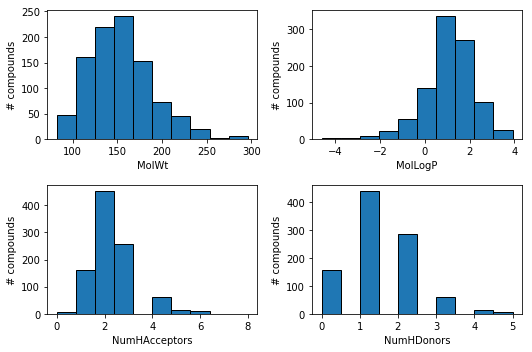

In [22]:
library = 'Zenobia_968.sdf'

plot_Ro3_descriptors(library)

# 3D descriptors

In [15]:
def calc_3D_descriptors(library):
    '''
    Calculate 3D descriptors from collection of molecules
    '''
    mols = Chem.SDMolSupplier(library)
    
    xrange = range(len(mols))
    zeros = np.zeros(len(mols))
    
    df = pd.DataFrame({'NPR1' : zeros, 'NPR2' : zeros, 'PBF' : zeros})
    df.name = library
    
    for x, tq in zip(xrange, tqdm(xrange, desc='calculating...')):
        m2 = Chem.AddHs(mols[x])
        AllChem.EmbedMolecule(m2)
        AllChem.MMFFOptimizeMolecule(m2)
        df['NPR1'][x] = AllChem.CalcNPR1(m2)
        df['NPR2'][x] = AllChem.CalcNPR2(m2)
        df['PBF'][x] = AllChem.CalcPBF(m2)
    
    return df

def gaussianKDE(x, y):
    
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    
    return z

def plot_3D_descriptors(library):
    '''
    NPR and PBF plots
    '''
    df = calc_3D_descriptors(library)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].scatter(df.NPR1, df.NPR2, c=gaussianKDE(df.NPR1, df.NPR2), cmap='jet', s=5, alpha=0.8)
    ax[0].set_ylim([0.45, 1.05])
    ax[0].set_xlim([-.05, 1.05])
    ax[0].plot(np.linspace(0, 1, 100), np.repeat(1, 100), c='k', linestyle='--')
    ax[0].plot(np.linspace(0, 0.5, 100), np.linspace(0, 0.5, 100)*-1+1, c='k', linestyle='--')
    ax[0].plot(np.linspace(0.5, 1, 100), np.linspace(0.5, 1, 100)*1, c='k', linestyle='--')
    ax[0].set_xlabel('NPR2')
    ax[0].set_ylabel('NPR1')
    
    ax[1].scatter(df.PBF, df.NPR1 + df.NPR2, c=gaussianKDE(df.PBF, df.NPR1 + df.NPR2), 
                  cmap='jet', s=5, alpha=0.8, label=df.name)
    ax[1].set_ylim([0.95, 1.75])
    ax[1].set_xlim([0, 1])
    ax[1].plot(np.linspace(0, 1, 100), np.repeat(1.07, 100), c='k', linestyle='--')
    ax[1].plot(np.repeat(0.6, 100), np.linspace(0.95, 1.75, 100), c='k', linestyle='--')
    ax[1].set_xlabel('PBF')
    ax[1].set_ylabel('NPR1+NPR2')

    plt.tight_layout()
    plt.show()
    plt.close()

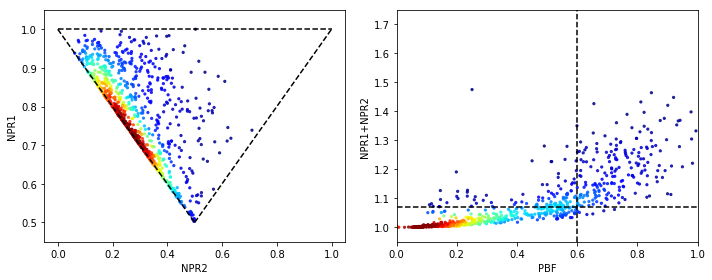

In [16]:
library = 'Zenobia_968.sdf'

plot_3D_descriptors(library)

# Fingerprint similarity

In [17]:
def calc_nearest_neighbors(fpsA, fpsB):
    
    molsA = Chem.SDMolSupplier(libraryA)
    molsB = Chem.SDMolSupplier(libraryB)
    fpsA = [FingerprintMols.FingerprintMol(molsA[x]) for x in range(len(molsA))]
    fpsB = [FingerprintMols.FingerprintMol(molsB[x]) for x in range(len(molsB))]

    nnA = np.zeros(len(fpsA))
    for x, tq in zip(range(len(fpsA)), tqdm(range(len(fpsA)), desc='calculating 1...')):
        similarity = 0.
        for y in range(len(fpsB)):
            tmp = DataStructs.FingerprintSimilarity(fpsA[x], fpsB[y])
            if tmp > similarity:
                similarity = tmp
            nnA[x] = similarity
        
    nnB = np.zeros(len(fpsB))
    for x, tq in zip(range(len(fpsB)), tqdm(range(len(fpsB)), desc='calculating 2...')):
        similarity = 0.
        for y in range(len(fpsA)):
            tmp = DataStructs.FingerprintSimilarity(fpsB[x], fpsA[y])
            if tmp > similarity:
                similarity = tmp
            nnB[x] = similarity
                
    return nnA, nnB

def plot_nearest_neighbors(libraryA, libraryB):
    
    nnA, nnB = calc_nearest_neighbors(libraryA, libraryB)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    
    ax[0].hist(nnA, edgecolor='k')
    ax[0].set_title(libraryA)
    ax[0].set_ylabel('# compounds')
    ax[0].set_xlabel('Fingerprint Similarity')
    
    ax[1].hist(nnB, edgecolor='k')
    ax[1].set_title(libraryB)
    ax[0].set_xlabel('Fingerprint Similarity')
    
    plt.show()
    plt.close()

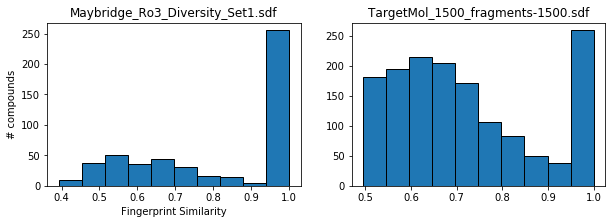

In [18]:
libraryA = 'Maybridge_Ro3_Diversity_Set1.sdf'
libraryB = 'TargetMol_1500_fragments-1500.sdf'

plot_nearest_neighbors(libraryA, libraryB)

# Fingerprint 2D depictions

In [34]:
ipca = pickle.load(open('ipca.pkl', 'rb'))

def decompose_mols(library):
    
    mols = Chem.SDMolSupplier(library)
    
    bits = [AllChem.GetMorganFingerprintAsBitVect(x, 2) for x in mols]
    X = np.zeros((len(bits), len(bits[0])))
    for i, b in enumerate(bits):
        X[i] = [int(x) for x in b]
        
    x = ipca.transform(X)
    
    return x.T

def gaussianKDE(x, y):
    
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    
    return z

def plot_pcs(libraryA, libraryB):
    
    XA, XB = decompose_mols(libraryA), decompose_mols(libraryB)
    
    xmin, xmax = np.min([np.min(XA[0]), np.min(XB[0])]), np.max([np.max(XA[0]), np.max(XB[0])])
    ymin, ymax = np.min([np.min(XA[1]), np.min(XB[1])]), np.max([np.max(XA[1]), np.max(XB[1])])
    
    fig, ax = plt.subplots(1, 2, figsize=(7.5, 4))
    
    ax[0].scatter(XA[0], XA[1], c=gaussianKDE(XA[0], XA[1]), cmap='jet', s=5, alpha=0.8)
    ax[0].set_ylabel('PC2')
    ax[0].set_xlabel('PC1')
    ax[0].set_xlim([xmin, xmax])
    ax[0].set_ylim([ymin, ymax])
    ax[0].set_title(libraryA)
    
    ax[1].scatter(XB[0], XB[1], c=gaussianKDE(XB[0], XB[1]), cmap='jet', s=5, alpha=0.8)
    ax[1].set_xlabel('PC1')
    ax[1].set_xlim([xmin, xmax])
    ax[1].set_ylim([ymin, ymax])
    ax[1].set_title(libraryB)
    
    plt.tight_layout()
    plt.show()
    plt.close()

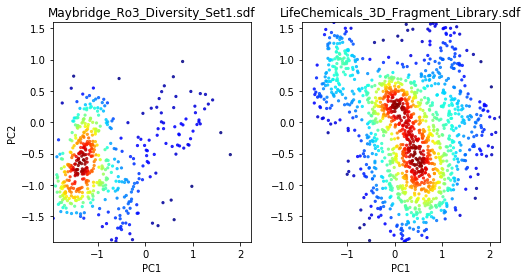

In [37]:
libraryA = 'Maybridge_Ro3_Diversity_Set1.sdf'
libraryB = 'LifeChemicals_3D_Fragment_Library.sdf'

plot_pcs(libraryA, libraryB)